Multivariate SARIMAX Forecasting Nuitees dans l'hôtellerie Pays de la Loire PDL 2016 
Datasets https://github.com/jinnyto/touristcast/tree/datasets/datasets

In [2]:
import pandas as pd
import numpy as np
import datetime 
import matplotlib.pyplot as plt
import pyramid
%matplotlib inline
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
dn = pd.read_csv('./datasets/nights_2010-2017.csv',parse_dates=['date'], index_col='date',usecols=[*range(1, 15)])
dm = pd.read_csv('./datasets/avgtemp_2010-2017.csv',parse_dates=['date'],index_col='date',usecols=[*range(1, 15)])
dh = pd.read_csv('./datasets/daysoff_2010-2017.csv',parse_dates=['date'],index_col='date',usecols=['date','daysoff'])
dg = pd.read_csv('./datasets/regionalGDP_2010-2015.csv',parse_dates=['date'],index_col='date',usecols=[*range(1, 15)])
dr = pd.concat([dn, dm,dh,dg], axis=1)
df = dr.dropna()
df = df[['nights_PDL','avgtemp_PDL','gdp_PDL','daysoff']]
df_exogeneous= df[['avgtemp_PDL','gdp_PDL','daysoff']]

<Figure size 432x288 with 0 Axes>

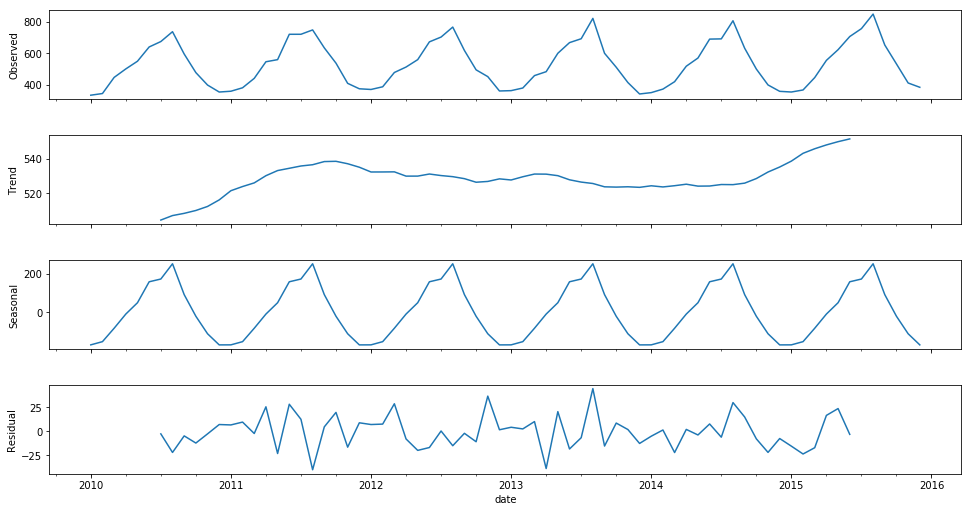

In [6]:
decomposition = seasonal_decompose(df.nights_PDL, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

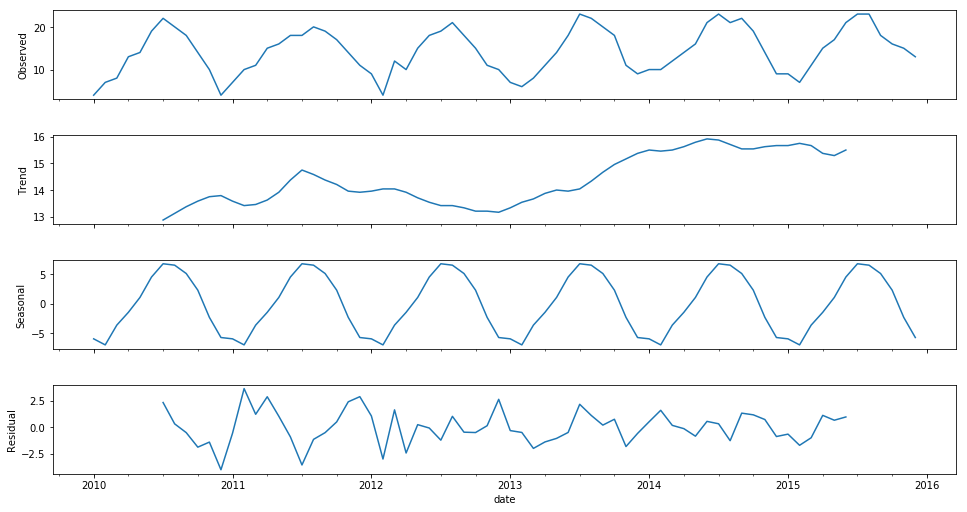

In [7]:
decomposition = seasonal_decompose(df.avgtemp_PDL, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

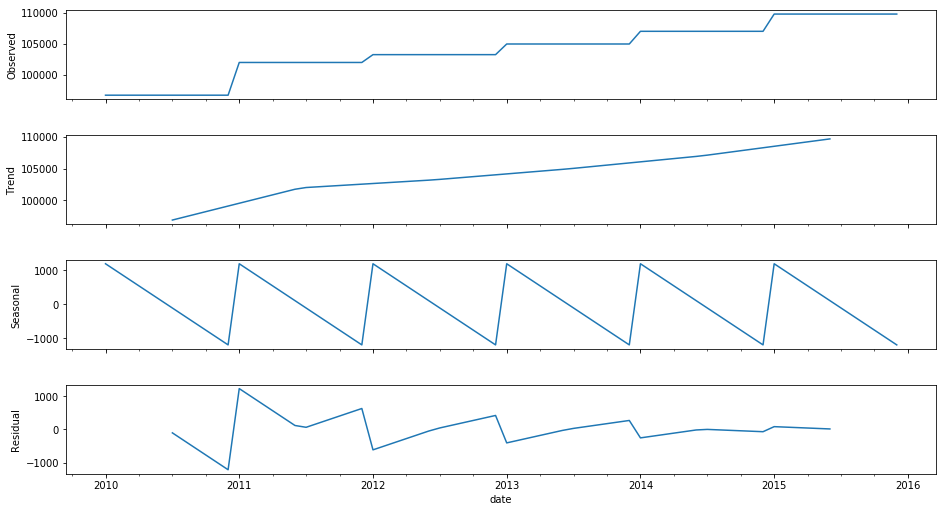

In [8]:
decomposition = seasonal_decompose(df.gdp_PDL, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

<Figure size 432x288 with 0 Axes>

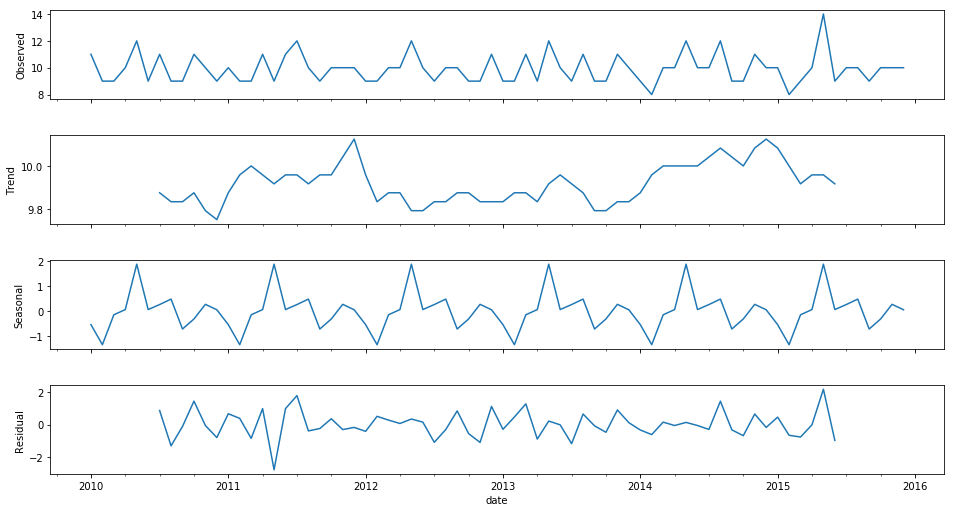

In [9]:
decomposition = seasonal_decompose(df.daysoff, freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [10]:
from pyramid.arima import auto_arima
tc_fit = auto_arima(np.array(df.nights_PDL),  exogeneous=np.array(df_exogeneous), start_p=1, start_q=1, max_p=5, max_q=5, m=12,
                    start_P=1, seasonal=True, n_jobs=-1, d=1, D=1, trace=True,
                    error_action='ignore',  # don't want to know if an order does not work
                    suppress_warnings=True,  # don't want convergence warnings
                    stepwise=False, random=True, random_state=42,  # we can fit a random search (not exhaustive)
                    n_fits=25)

tc_fit.summary()

Fit ARIMA: order=(4, 1, 3) seasonal_order=(1, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(2, 1, 4) seasonal_order=(2, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(4, 1, 2) seasonal_order=(2, 1, 1, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=562.545, BIC=577.088, Fit time=1.972 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=560.852, BIC=573.317, Fit time=2.007 seconds
Fit ARIMA: order=(2, 1, 3) seasonal_order=(1, 1, 1, 12); AIC=564.170, BIC=582.868, Fit time=5.628 seconds
Fit ARIMA: order=(4, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 4) seasonal_order=(1, 1, 1, 12); AIC=555.814, BIC=574.512, Fit time=7.583 seconds
Fit ARIMA: order=(4, 1, 4) seasonal_order=(1, 1, 1, 12); AIC=560.898, BIC=585.828, Fit time=9.270 seconds
Fit ARIMA: order=(3, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=560.992, BIC=577.612, Fit

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   72
Model:             SARIMAX(1, 1, 4)x(1, 1, 1, 12)   Log Likelihood                -268.907
Date:                            Sat, 18 Aug 2018   AIC                            555.814
Time:                                    20:06:32   BIC                            574.512
Sample:                                         0   HQIC                           563.113
                                             - 72                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0454      0.227     -0.200      0.841      -0.490       0.399
ar.L1          0.3853      0.273      1.412      0.158      -0.150       0.920
ma.L1         -1.4118      0.410     -3.444      0.001      -2.215      -0.608
ma.L2          0.8458      0.428      1.975      0.048       0.007       1.685
ma.L3          0.0039      0.350      0.011      0.991      -0.683       0.691
ma.L4         -0.4085      0.220     -1.854      0.064      -0.840       0.023
ar.S.L12       0.2505      0.434      0.577      0.564      -0.601       1.102
ma.S.L12      -0.7216      0.600     -1.202      0.229      -1.898       0.455
sigma2       447.0776    182.943      2.444      0.015      88.516     805.639
===================================================================================
Ljung-Box (Q):                       27.31   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.94   Prob(JB):                         0.54
Heteroskedasticity (H):               0.65   Skew:                             0.20
Prob(H) (two-sided):                  0.34   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
dftrain = dr[(dr.index>='2010-01-01')&(dr.index<'2016-01-01')]
train_nights  = np.array(dftrain.nights_PDL)

dftest = dr[(dr.index>='2016-01-01')&(dr.index<'2017-01-01')]
test_nights = np.array(dftest.nights_PDL)
test_exogenous=np.array(dftest[['avgtemp_PAC','gdp_PAC','daysoff']])

In [16]:
tc_fit.fit(train_nights)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(1, 1, 4),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 1, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [17]:
tc_future_forecast = tc_fit.predict(n_periods=12,exogenous=test_exogenous)

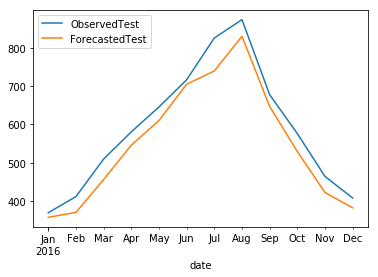

In [18]:
tc_dff = pd.DataFrame(tc_future_forecast, index = dftest.index)
pd.concat([dftest.nights_PDL,tc_dff],axis=1).plot()
L=plt.legend()
L.get_texts()[0].set_text('ObservedTest')
L.get_texts()[1].set_text('ForecastedTest')

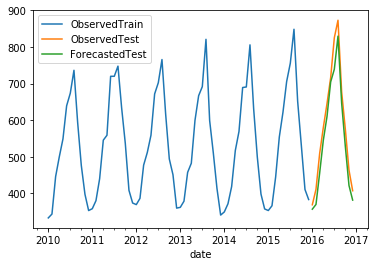

In [19]:
pd.concat([dftrain.nights_PDL,dftest.nights_PDL,tc_dff],axis=1).plot()
L=plt.legend()
L.get_texts()[0].set_text('ObservedTrain')
L.get_texts()[1].set_text('ObservedTest')
L.get_texts()[2].set_text('ForecastedTest')
plt.show()

In [20]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
def MASE(testing_series, prediction_series):
    n = testing_series.shape[0]
    scalingFactor = prediction_series.mean()
    errors = testing_series - prediction_series
    scaledErrors = errors/(np.sum(np.abs(testing_series - scalingFactor)) / n)
    return np.abs(scaledErrors).mean()

In [ ]:
mae = mean_absolute_error(test_nights, tc_future_forecast)
print('MAE: %f' % mae)
mse = mean_squared_error(test_nights, tc_future_forecast)
print('MSE: %f' % mse)
rmse = sqrt(mse)
print('RMSE: %f' % rmse)
mase = MASE(np.array(test_nights),tc_future_forecast)
print('MASE: %f' % mase)